In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.8.0 (default, Nov  6 2019, 15:49:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [3]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6d

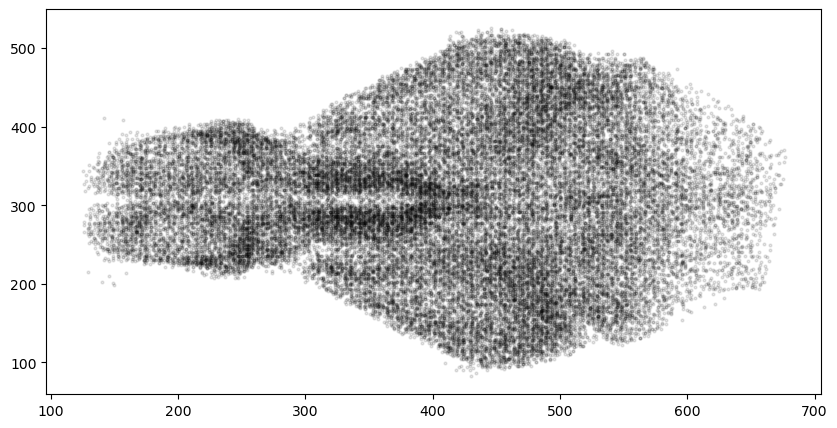

In [103]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
trace_ch = het_reg_deltaff

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(trace_ch[i])], 'inbrain')
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 4, c = 'k', alpha = 0.1)
plt.show()

In [9]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
i=0
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))
trace, bind, coord = tfn.select_region( np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Subpallium')


## SPONTANEOUS

In [ ]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'all')

    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = spike_stats(bind, trace)
    

    wt_spikes[i] =spikes
    wt_amp[i] = mean_amp
    wt_n_trans[i] = n_trans
    wt_mean_transdur[i] = mean_transdur
    wt_corr[i] = corr
    wt_dim[i] = dimen
    print(i)
    

In [9]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_spike.csv')
p_spike_df=pd.concat((p_spike_df[:3],p_spike_df[4:]))

In [10]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
ptz_spike_df = pd.read_csv(path+'foxg1_spikes_ptz.csv')
ptz_spike_df

,mean spikes per neuron - PTZ,Labels
0,1574.898868,WT
1,1031.753230,WT
2,976.944637,WT
3,1496.602287,WT
4,1076.691617,HET
5,1357.050154,HET
6,1283.942222,HET
7,1793.956094,HET
8,1323.264432,HET
9,1522.631702,HET


In [14]:
p_spike_df['lfc'] = np.log2(ptz_spike_df['mean spikes per neuron - PTZ'].values/p_spike_df['mean spike count per neuron'].values)

/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette

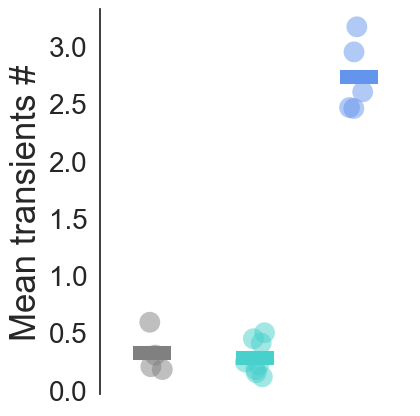

In [15]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="lfc", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [17]:
from scipy import stats
data1 = p_spike_df["lfc"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.3196387184035538 0.09464953543900026
0.2829057561388077 0.052224152061719306
2.7300197959627774 0.14204983772998164


In [18]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 19.0   p = 0.6828282828282828
U = 0.0   p = 0.015873015873015872


In [22]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_amplitude.csv')
p_spike_df=pd.concat((p_spike_df[:3],p_spike_df[4:]))
p_spike_df

,mean fluorescence per neuron,Labels
0,6.528919,WT
1,7.140035,WT
2,8.878517,WT
4,6.790088,WT
5,6.749306,HET
6,7.073435,HET
7,5.999554,HET
8,7.419044,HET
9,8.280692,HET
10,6.380633,HET


In [21]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
ptz_spike_df = pd.read_csv(path+'foxg1_amplitude_ptz.csv')
ptz_spike_df

,mean fluorescence per neuron - PTZ,Labels
0,6.390085,WT
1,7.743942,WT
2,7.878058,WT
3,7.149753,WT
4,7.542465,HET
5,7.465558,HET
6,5.765892,HET
7,7.192795,HET
8,7.543114,HET
9,6.853876,HET


In [24]:
p_spike_df['lfc'] = np.log2(ptz_spike_df['mean fluorescence per neuron - PTZ'].values/p_spike_df['mean fluorescence per neuron'].values)

In [26]:
point = np.zeros((18))

p_spike_df = {}
count=0
choose = 0

data = [wt_spikes, het_spikes, hom_spikes]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

p_spike_df = pd.DataFrame({"mean spike count per neuron":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette

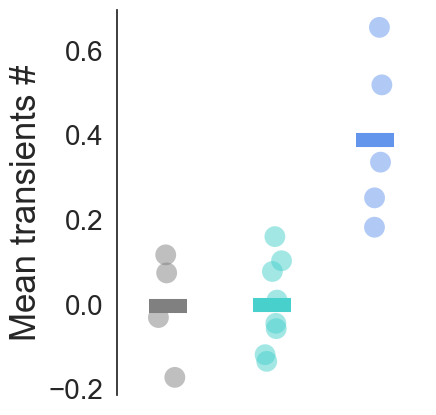

In [25]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="lfc", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [26]:
from scipy import stats
data1 = p_spike_df["lfc"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

-0.0029718969243124546 0.06451160412215613
-0.0004801014226791106 0.03780232650575753
0.38897951751975973 0.0871427937056633


In [27]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 1.0
U = 0.0   p = 0.015873015873015872


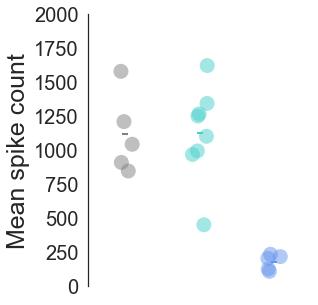

In [58]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean spike count per neuron", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean spike count per neuron", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean spike count', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_spikes.svg', transparent = True)
plt.show()

In [10]:
from scipy import stats
data1 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1119.7412077690005 131.28930931395078
1126.7499960664231 121.61398669044105
179.44141520279086 25.39163880562224


In [11]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 0.30420390011649917
U = 0.0   p = 0.006092890177672406


In [19]:
from scipy import stats
data1 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1270.0497555692725 154.63798477766147
1362.2642989641738 144.60080451694637
1215.653762508231 209.0089955200502


In [20]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 13.0   p = 0.3355627291949064
U = 9.0   p = 0.4512616250888397


In [54]:
amp_df = pd.read_csv('foxg1_amplitude_PTZ.csv')
amp_df

,mean fluorescence per neuron - PTZ,Labels
0,6.390085,WT
1,7.743942,WT
2,7.878058,WT
3,7.149753,WT
4,7.542465,HET
5,7.465558,HET
6,5.765892,HET
7,7.192795,HET
8,7.543114,HET
9,6.853876,HET


In [68]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_amp, het_amp, hom_amp]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

amp_df = pd.DataFrame({"mean fluorescence per neuron":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

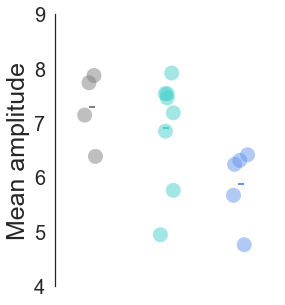

In [56]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean fluorescence per neuron - PTZ", data = amp_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean fluorescence per neuron - PTZ", data=amp_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean amplitude', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 9, bottom = 4)
plt.savefig(Ffig + 'foxg1_amp_PTZ.svg', transparent = True)
plt.show()

In [28]:
from scipy import stats
data1 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

7.2904593748345725 0.3392872993814923
6.90440664084281 0.3628589983442974
5.883694630884653 0.3081460936138665


In [29]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 13.0   p = 0.3355627291949064
U = 1.0   p = 0.01866820796033144


In [81]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_n_trans, het_n_trans, hom_n_trans]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

ntrans_df = pd.DataFrame({"n trans":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

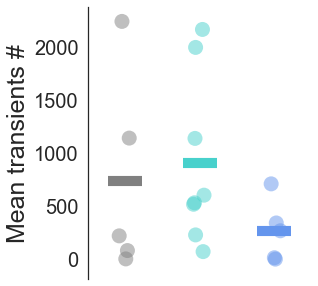

In [83]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="n trans", data = ntrans_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="n trans", data=ntrans_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [84]:
from scipy import stats
data1 = ntrans_df["n trans"][ntrans_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = ntrans_df["n trans"][ntrans_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = ntrans_df["n trans"][ntrans_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

739.4 429.55961169551307
909.375 280.2854372586733
267.0 130.2796991092626


In [85]:

#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 0.30420390011649917
U = 10.0   p = 0.33805165701157347


In [37]:
transdur_df = pd.read_csv('foxg1_transient_duration_PTZ.csv')
transdur_df

,data,Labels
0,1.382551,WT
1,1.206243,WT
2,1.217687,WT
3,1.359289,WT
4,1.232931,HET
5,1.303909,HET
6,1.261020,HET
7,1.371735,HET
8,1.295311,HET
9,1.375033,HET


In [90]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_mean_transdur, het_mean_transdur, hom_mean_transdur]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i][choose])/2.73
        count+=1

transdur_df = pd.DataFrame({"transdur":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

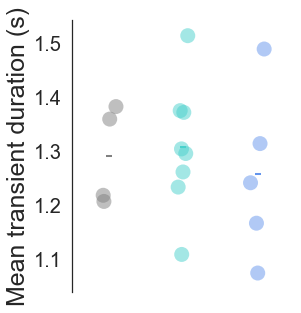

In [38]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="data", data = transdur_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=transdur_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transient duration (s)', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'foxg1_transdur_PTZ.svg', transparent = True)
plt.show()

In [40]:
from scipy import stats
data1 = transdur_df["data"][transdur_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = transdur_df["data"][transdur_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = transdur_df["data"][transdur_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1.2914425620335375 0.046190448054030754
1.307748153759799 0.042097139993585435
1.2566421227277904 0.07058775410284358


In [41]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 14.0   p = 0.3994533348216349
U = 8.0   p = 0.3566515869392288


In [64]:
corr_df = pd.read_csv('foxg1_correlation.csv')
corr_df

,mean pairwise correlation,Labels
0,0.003684,WT
1,0.003620,WT
2,0.004944,WT
3,0.003125,WT
4,0.003756,WT
5,0.003763,HET
6,0.002422,HET
7,0.002851,HET
8,0.002673,HET
9,0.002992,HET


In [49]:
point = np.zeros((18))
choose= 0
count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i][choose])
        count+=1

corr_df = pd.DataFrame({"Pallium mean pairwise correlation":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

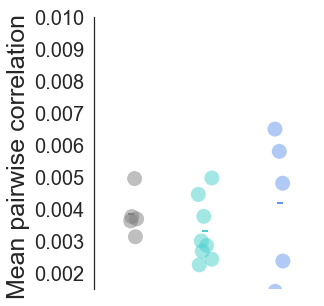

In [65]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean pairwise correlation", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean pairwise correlation", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean pairwise correlation ', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 0.010, bottom = 0.0015)

plt.savefig(Ffig + 'foxg1_corr.svg', transparent = True)
plt.show()

In [51]:
from scipy import stats
data1 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.00320693992814485 0.0005386046548831219
0.00446291442865775 0.0002701495454932791
0.00604071902424712 0.0012579660730787712


In [52]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 5.0   p = 0.03726578552730971
U = 3.0   p = 0.055673443266570206


In [55]:
from scipy import stats
wt_corr = corr_df[corr_df['Labels'] == 'WT']
het_corr = corr_df[corr_df['Labels'] == 'HET']
hom_corr = corr_df[corr_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_corr['Subpallium mean pairwise correlation'], het_corr['Subpallium mean pairwise correlation'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 1.5524160031930803   p = 0.14884220370127407
Samples are the same


In [68]:
point = np.zeros((18))

count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

corr_df = pd.DataFrame({"mean pairwise correlation":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [68]:
point = np.zeros((18))

count=0
choose = 0
data = [wt_dim, het_dim, hom_dim]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i][choose]
        count+=1

dim_df = pd.DataFrame({"Pallium dimensionality":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

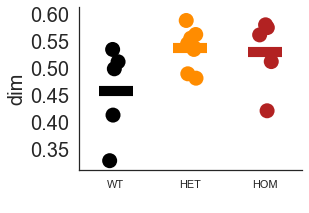

In [69]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Pallium dimensionality", data = dim_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Pallium dimensionality", data=dim_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dim', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [71]:
wt_dim = dim_df[dim_df['Labels'] == 'WT']
het_dim = dim_df[dim_df['Labels'] == 'HET']
hom_dim = dim_df[dim_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05

t, p = stats.ttest_ind(wt_dim['Pallium dimensionality'], het_dim['Pallium dimensionality'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.364841218173482   p = 0.03749196879426136
Samples are significantly different


## PTZ02

In [92]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdrop + 'Project/' + experiment)

wt_lab_coord = sorted(glob.glob('*++*PTZ02_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ02_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ02_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ02_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ02_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ02_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ02_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ02_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ02_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'

In [93]:
wt_lab_coord, wt_reg_deltaff, wt_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'])

In [94]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    wt_spikes[i] = spikes
    wt_amp[i] = mean_amp
    wt_n_trans[i] = n_trans
    wt_mean_transdur[i] = mean_transdur 
    wt_corr[i] = corr
    wt_dim[i] = dimen
    print(i)
    

0
1
2
3


In [138]:
het_lab_coord, het_reg_deltaff, het_reg_bind

(['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ

In [95]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind
het_spikes, het_amp, het_n_trans, het_mean_transdur, het_corr, het_dim =  list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    het_spikes[i] = spikes
    het_amp[i] = mean_amp
    het_n_trans[i] = n_trans
    het_mean_transdur[i] = mean_transdur 
    het_corr[i] = corr
    het_dim[i] = dimen
    print(i)

0
1
2
3
4
5
6
7


In [139]:
hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
 

In [96]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind
hom_spikes, hom_amp, hom_n_trans, hom_mean_transdur, hom_corr, hom_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    hom_spikes[i] = spikes
    hom_amp[i] = mean_amp
    hom_n_trans[i] = n_trans
    hom_mean_transdur[i] = mean_transdur 
    hom_corr[i] = corr
    hom_dim[i] = dimen
    print(i)

0
1
2
3
4


In [258]:
len(wt_lab_coord), len(het_lab_coord), len(hom_lab_coord)

(4, 8, 5)

In [98]:
point = np.zeros((17))

spike_df = {}
count=0

data = [wt_spikes, het_spikes, hom_spikes]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

spike_df = pd.DataFrame({"mean spikes per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [100]:
spike_df.to_csv('foxg1_spikes_PTZ.csv',index=False)

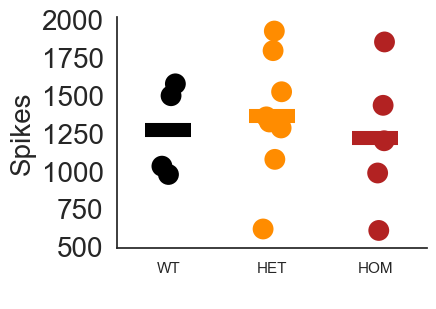

In [298]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Spikes', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [70]:
wt_spike = spike_df[spike_df['Labels'] == 'WT']
het_spike = spike_df[spike_df['Labels'] == 'HET']
hom_spike = spike_df[spike_df['Labels'] == 'HOM']

In [71]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_spike['data'], het_spike['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.3284269325550995   p = 0.748756019429677
Samples are the same


In [73]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_spike['data'], hom_spike['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.4766035096103938   p = 0.6463904553091148
Samples are the same


In [102]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_amp, het_amp, hom_amp]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

amp_df = pd.DataFrame({"mean fluorescence per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [103]:
amp_df

,mean fluorescence per neuron - PTZ,Labels
0,6.390085,WT
1,7.743942,WT
2,7.878058,WT
3,7.149753,WT
4,7.542465,HET
5,7.465558,HET
6,5.765892,HET
7,7.192795,HET
8,7.543114,HET
9,6.853876,HET


In [104]:
amp_df.to_csv('foxg1_amplitude_PTZ.csv',index=False)

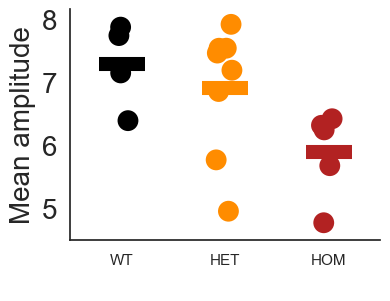

In [300]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = amp_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=amp_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean amplitude', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [149]:
wt_amps = amp_df[amp_df['Labels'] == 'WT']
het_amps = amp_df[amp_df['Labels'] == 'HET']
hom_amps = amp_df[amp_df['Labels'] == 'HOM']

In [151]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_amps['data'], het_amps['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 1.152517979002994   p = 0.2735396219092233
Samples are the same


In [152]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_amps['data'], hom_amps['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 2.2602515399402527   p = 0.05370127930764889
Samples are the same


In [270]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_n_trans, het_n_trans, hom_n_trans]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

ntrans_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

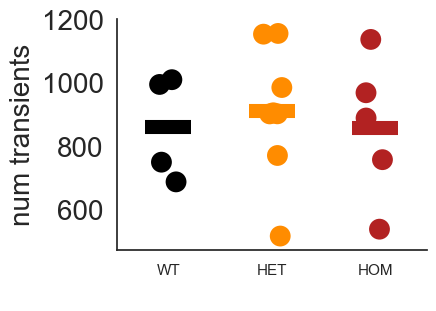

In [271]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = ntrans_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=ntrans_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('num transients', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [105]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_mean_transdur, het_mean_transdur, hom_mean_transdur]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

transdur_df = pd.DataFrame({"mean transient duration per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [106]:
transdur_df.to_csv('foxg1_transient_duration_PTZ.csv',index=False)

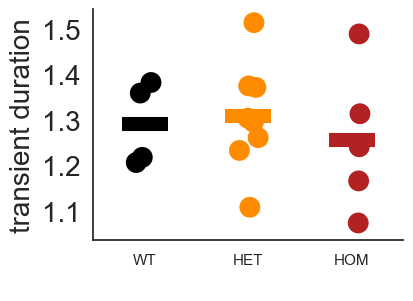

In [273]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = transdur_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=transdur_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('transient duration', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [90]:
len(data[0])

5

In [110]:
point = np.zeros((17))

count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

corr_df = pd.DataFrame({"mean pairwise correlation - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [112]:
corr_df.to_csv('foxg1_correlation_PTZ.csv',index=False)

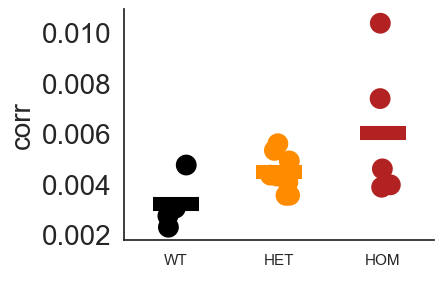

In [108]:

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('corr', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [109]:
wt_corrs = corr_df[corr_df['Labels'] == 'WT']
het_corrs = corr_df[corr_df['Labels'] == 'HET']
hom_corrs = corr_df[corr_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05

t, p = stats.ttest_ind(wt_corrs['data'], het_corrs['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.3576146053291676   p = 0.040116182319331985
Samples are significantly different


In [114]:
point = np.zeros((17))

count=0

data = [wt_dim, het_dim, hom_dim]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

dim_df = pd.DataFrame({"dimensionality PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


In [115]:
dim_df.to_csv('foxg1_dim_PTZ.csv',index=False)

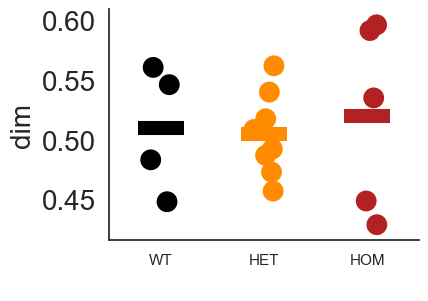

In [283]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = dim_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=dim_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dim', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [316]:
point = np.zeros((17))

count=0

data = [wt_list, het_list, hom_list]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

corr_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


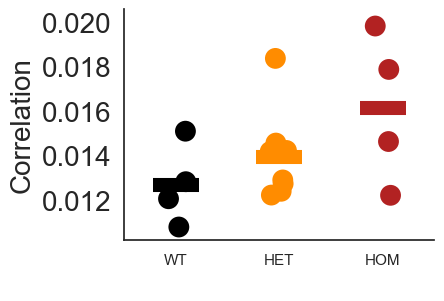

In [317]:


from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Correlation', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

# Cell number

In [236]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdrop + 'Project/' + experiment)

wt_lab_coord = sorted(glob.glob('*++*PTZ02_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ02_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ02_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ02_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ02_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ02_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ02_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ02_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ02_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'

In [ ]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

hom_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    hom_list[i] = corrme(trace[0], sub_coord, cutoff)


In [122]:
def corrme(data, coord, cutoff):
    fullmat = np.corrcoef(data)
    right_n = fullmat[coord[:,0] > cutoff]
    corr = 0
    count=0
    for i in range(right_n.shape[0]):
        corr+= np.mean(right_n[i][coord[:,0] < cutoff])
        count+=1
    corr_mean = corr/count
    return(corr_mean)

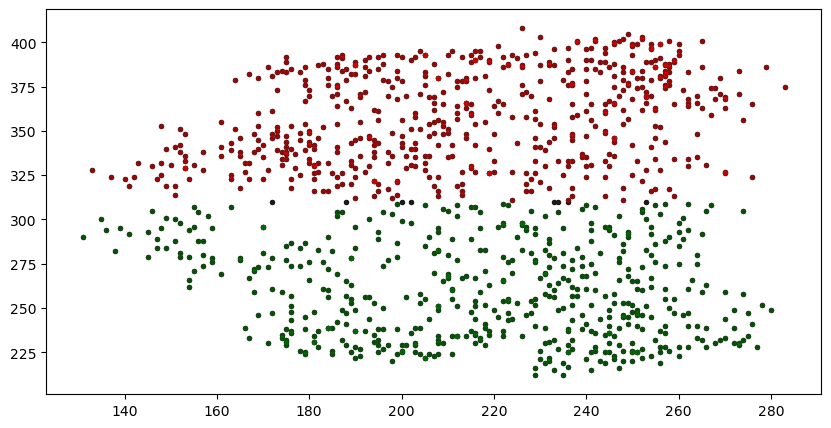

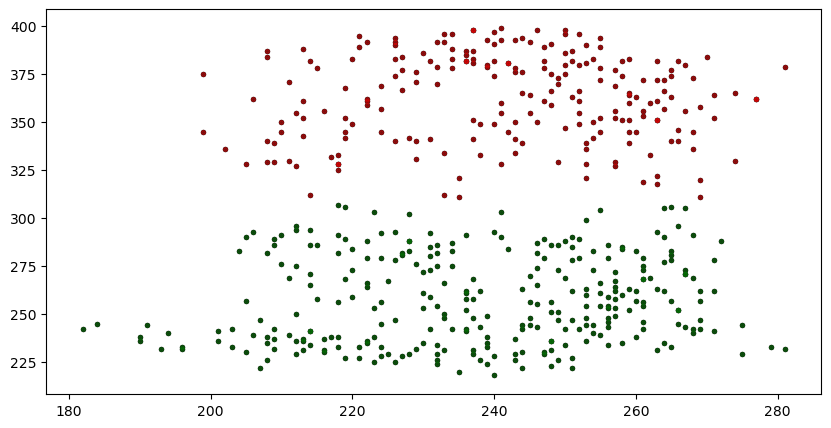

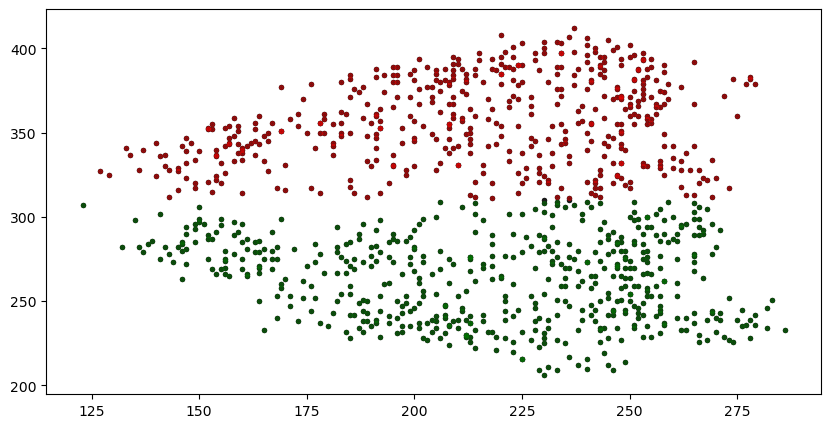

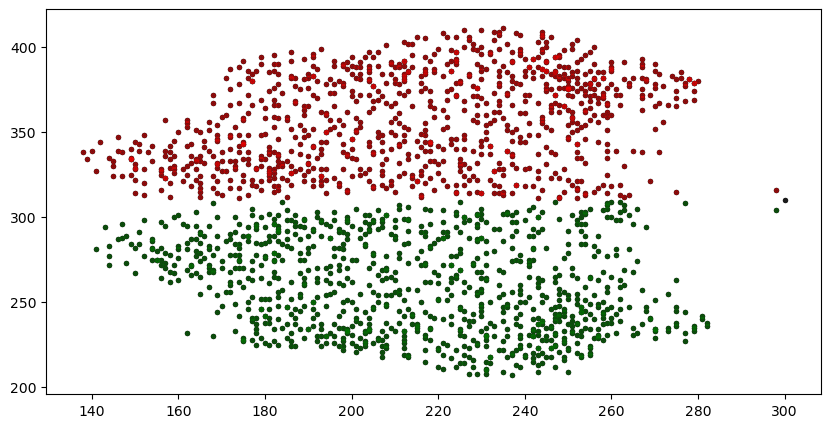

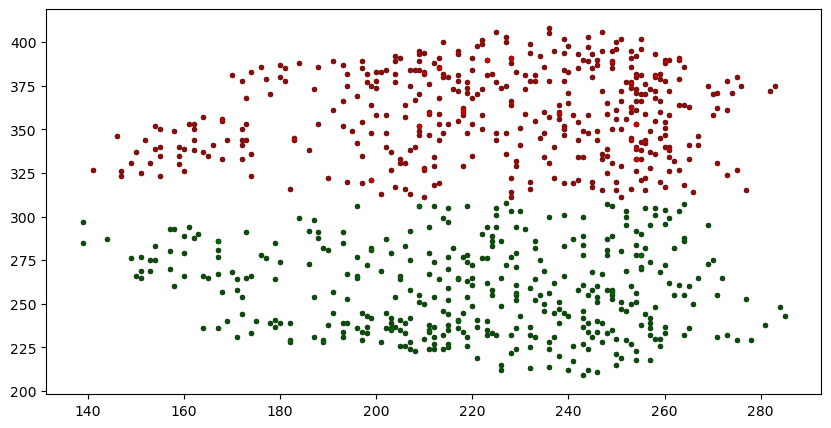

In [155]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

hom_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    hom_list[i] = corrme(trace[0], sub_coord, cutoff)


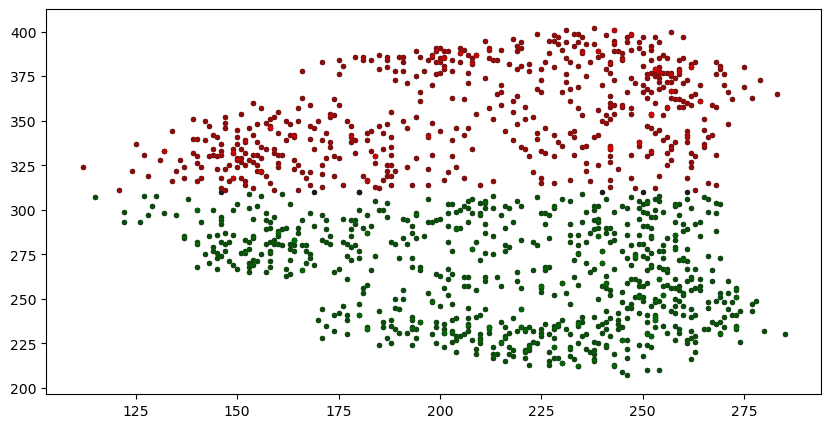

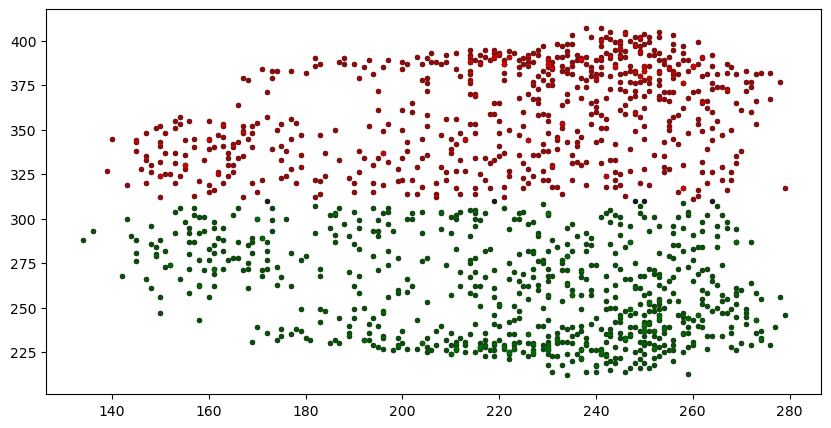

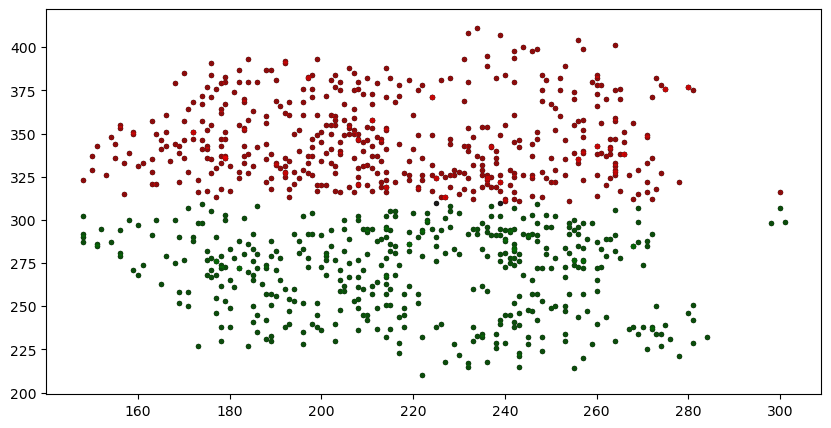

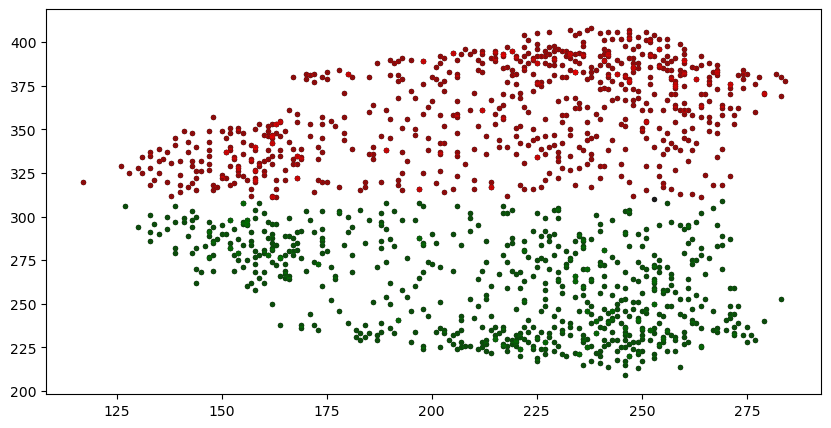

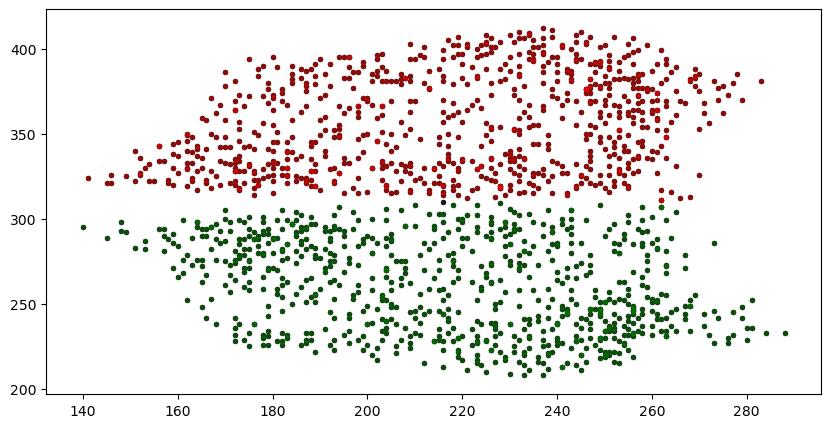

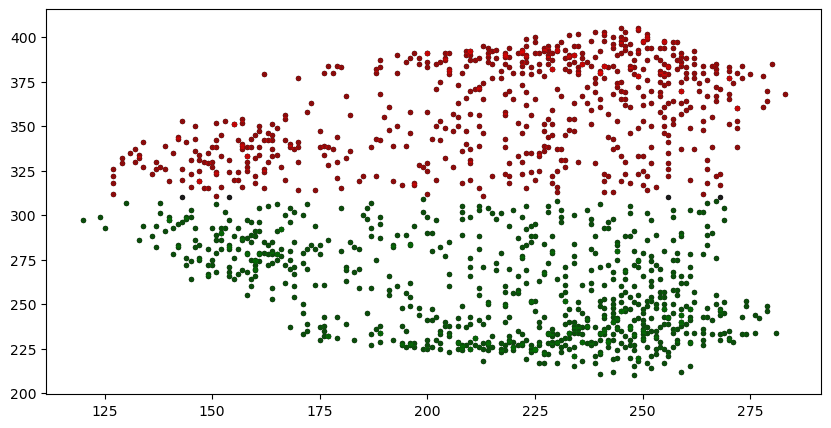

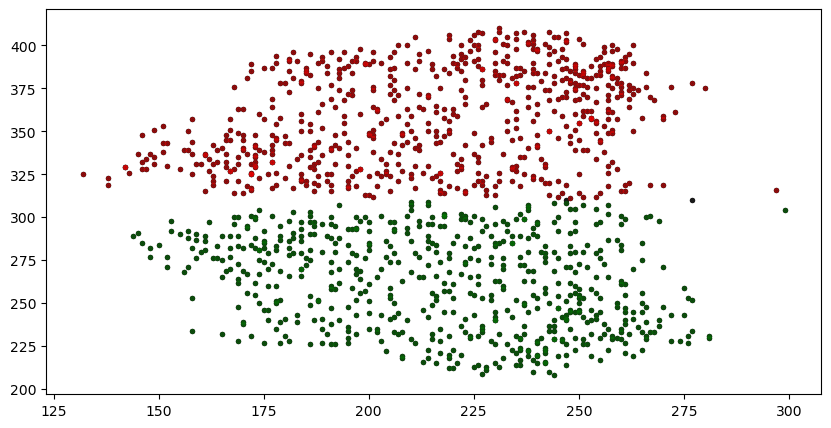

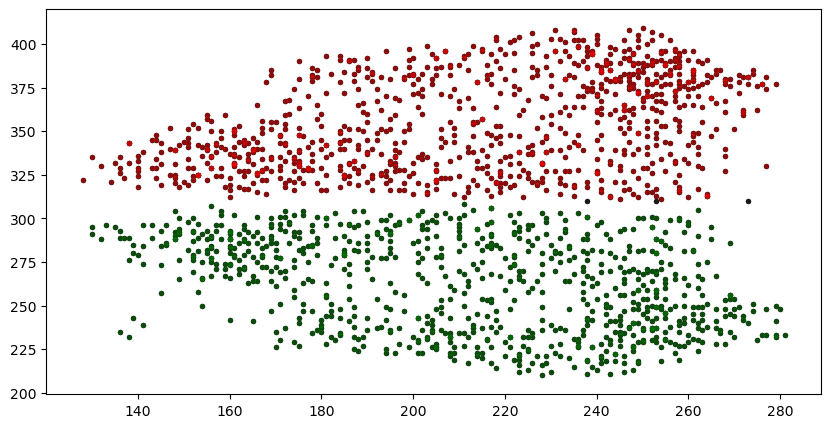

In [157]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

het_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    het_list[i] = corrme(trace[0], sub_coord, cutoff)


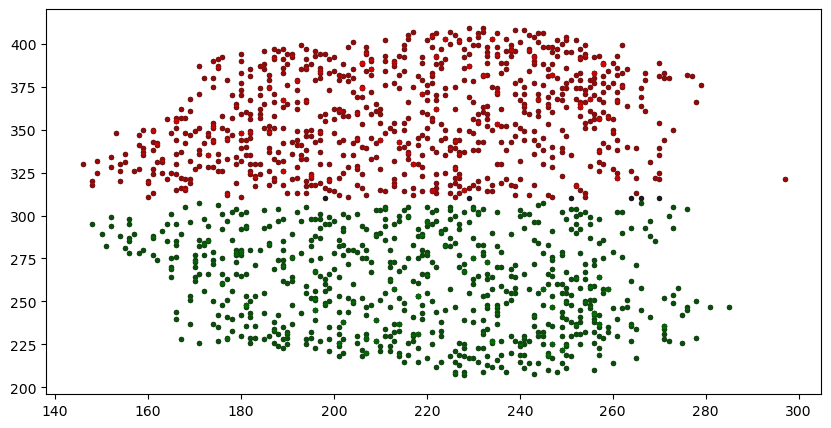

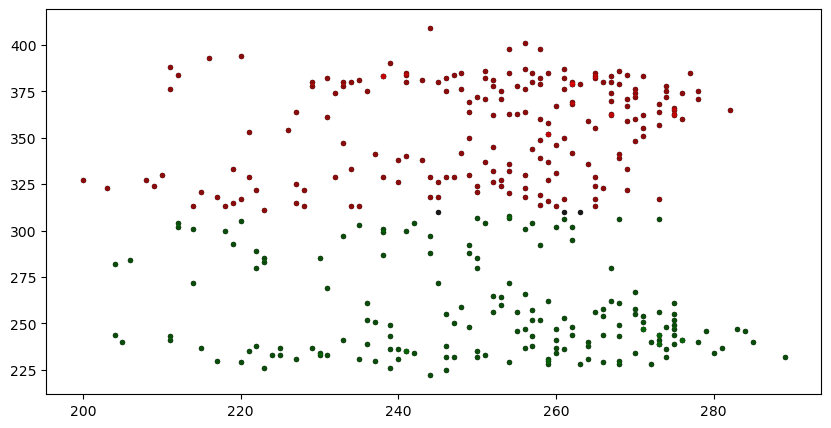

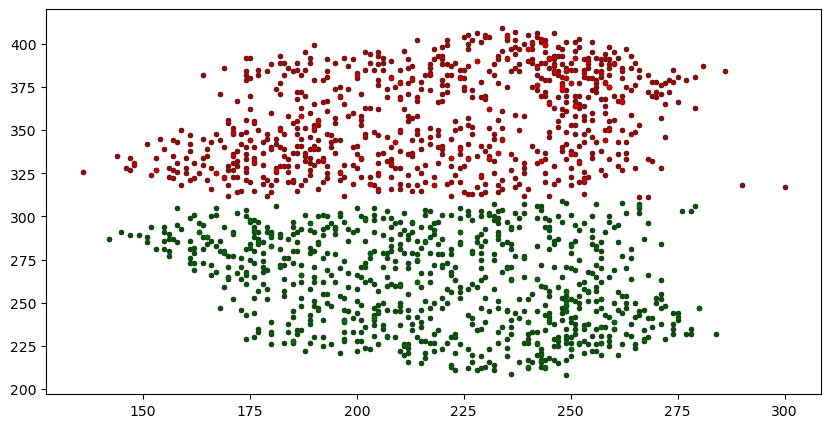

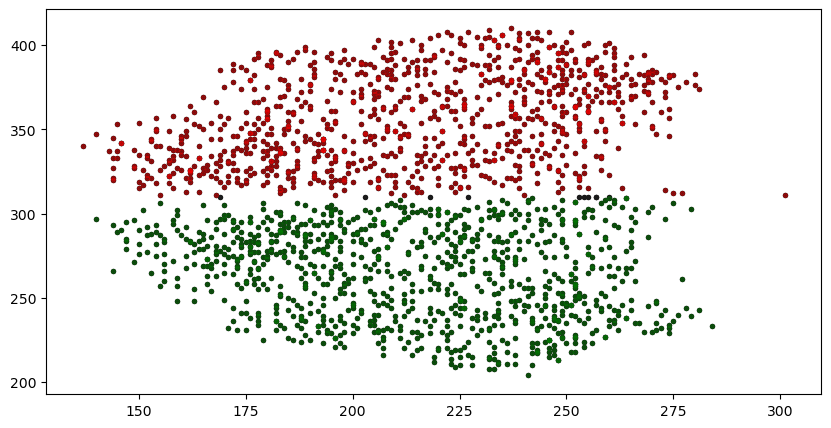

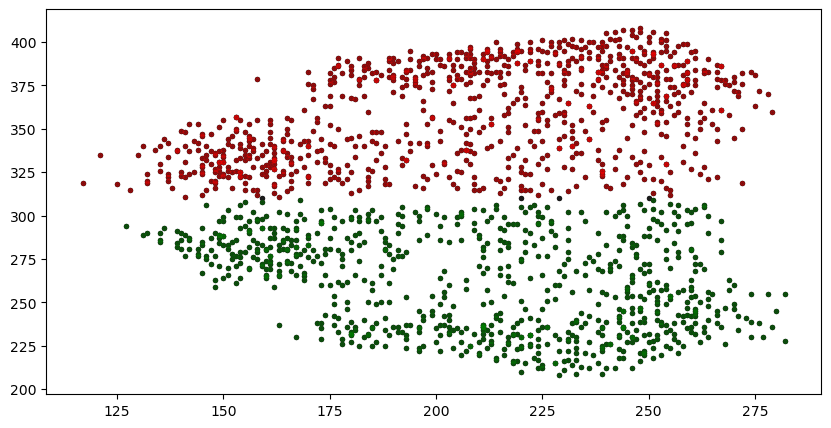

In [158]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind

wt_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    wt_list[i] = corrme(trace[0], sub_coord, cutoff)


In [145]:
corrme(trace[0], sub_coord, cutoff)

0.06612412481749158

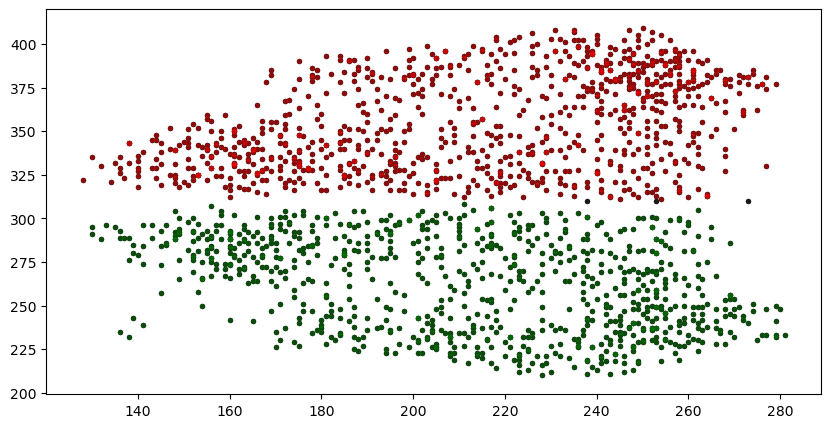

0.0333798206019106

In [146]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind
time = 9828

i = 7
coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

from matplotlib import cm
plt.figure(figsize = (10,5))

cutoff = 310
sub_coord = (coord[:,:3].astype(float)).astype(int)
plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
plt.show()
corrme(trace[0], sub_coord, cutoff)

# Spatial distribution by spike feature

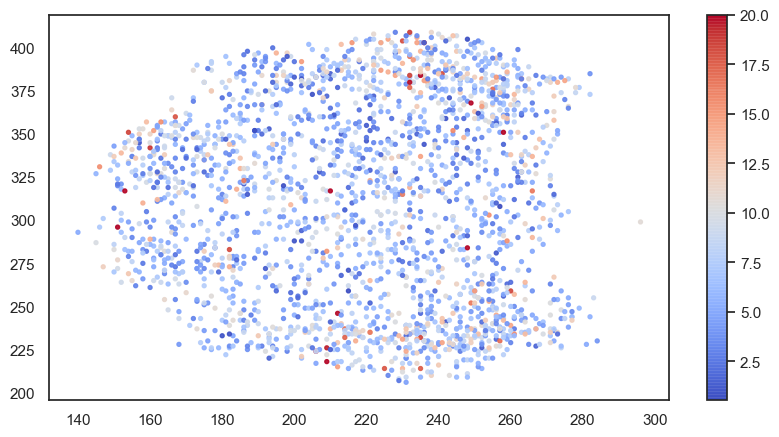

In [480]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()
plt.show()

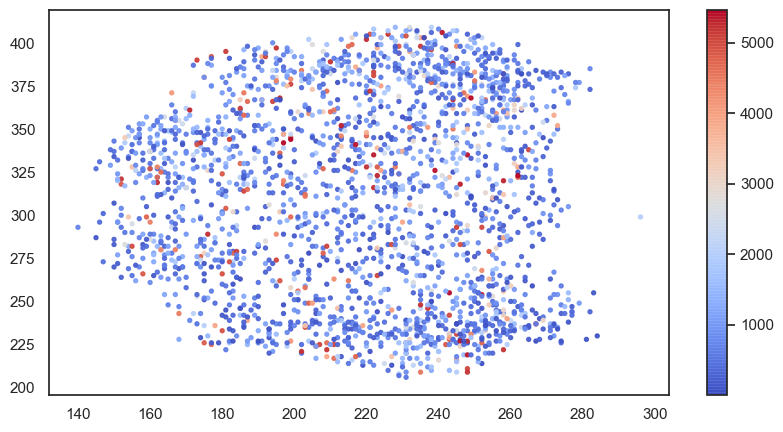

In [476]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = spikes , alpha = 0.9, cmap = 'coolwarm')#, vmax = 250000)
plt.colorbar()
plt.show()

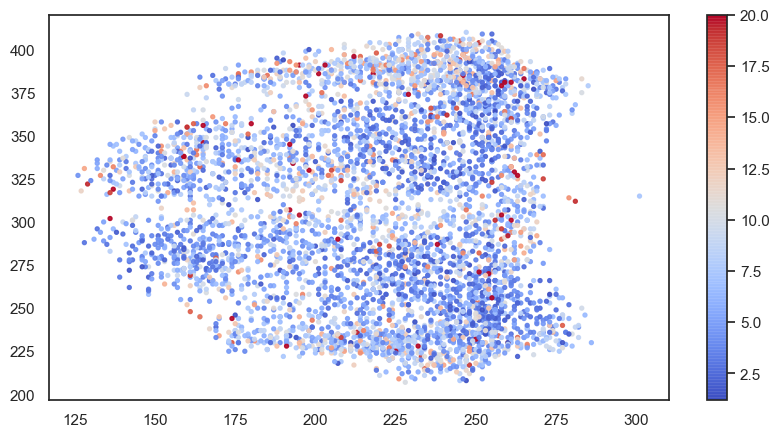

In [481]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()

plt.show()

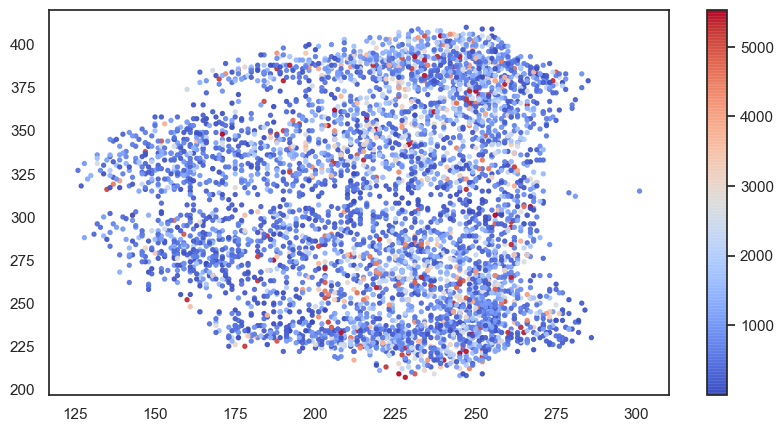

In [474]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = spikes , alpha = 0.9, cmap = 'coolwarm')
plt.colorbar()

plt.show()

# Functional connectivity

In [6]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_tlist = sorted(glob.glob('*1+-*BLNLIGHT*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*BLNLIGHT*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*BLNLIGHT*realtrace*'))
het_clist = sorted(glob.glob('*1+-*BLNLIGHT*realcoord*'))
hom_clist =  sorted(glob.glob('*1--*BLNLIGHT*realcoord*'))
wt_clist = sorted(glob.glob('*1++*BLNLIGHT*realcoord*'))
wt_tlist, het_tlist, hom_tlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'])

In [ ]:
#FCD
from sklearn.metrics.pairwise import euclidean_distances
trace_list = wt_tlist
coord_list = wt_clist
ans_list = list(range(len(trace_list)))

for i in range(len(trace_list)):
    trace = np.load(trace_list[i])
    corr = np.corrcoef(trace)
    dist = euclidean_distances(np.load(coord_list[i]))
    corrdistbin = crfn.corrdis_bin(corr, dist, 50)
    name = trace_list[i][:trace_list[i].find('run') + 7]
    #np.save(savepath + name + 'corrdist.npy', corrdistbin)

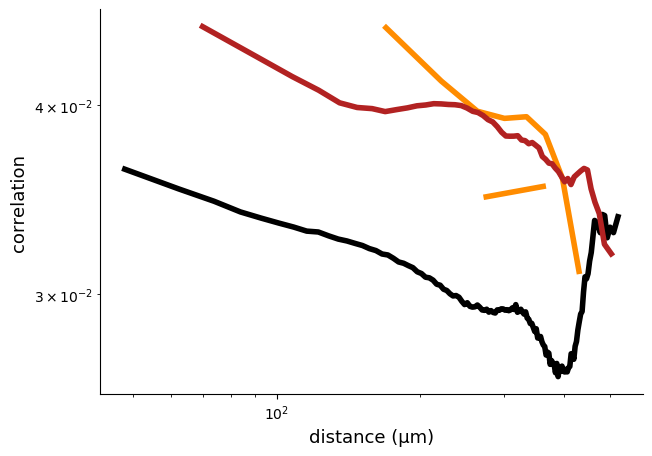

In [30]:
import matplotlib
import powerlaw
from scipy import stats

#BLNLIGHT
plotlist = wt_fclist, het_fclist, hom_fclist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']


for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, color = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
#axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

# Eigenspectrum

In [3]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_tlist = sorted(glob.glob('*1+-*PTZ02*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*PTZ02*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*PTZ02*realtrace*'))
wt_tlist, het_tlist, hom_tlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'])

In [11]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_vlist = sorted(glob.glob('*1+-*PTZ02*eigvar*'))
hom_vlist =  sorted(glob.glob('*1--*PTZ02*eigvar*'))
wt_vlist = sorted(glob.glob('*1++*PTZ02*eigvar*'))
wt_vlist, het_vlist, hom_vlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'])

In [ ]:
het_tlist = sorted(glob.glob('*1+-*BLNLIGHT*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*BLNLIGHT*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*BLNLIGHT*realtrace*'))
wt_tlist, het_tlist, hom_tlist

In [79]:
list_list = wt_tlist, het_tlist, hom_tlist
for i in range(len(list_list)):
    for e in range(len(list_list[i])):
        print(np.load(list_list[i][e]).shape)

(14508, 11521)
(9775, 11521)
(7407, 11466)
(9893, 11521)
(7669, 11466)


In [ ]:
from sklearn import decomposition
data_list = wt_tlist
comp = 7000
for i in range(len(data_list)):
    data = np.load(data_list[i])
    pca = decomposition.PCA(comp)
    fit = pca.fit(data)
    var = fit.explained_variance_ratio_
    name = data_list[i][:data_list[i].find('run') + 7]
    np.save(savepath + name + 'eigvar.npy', var)

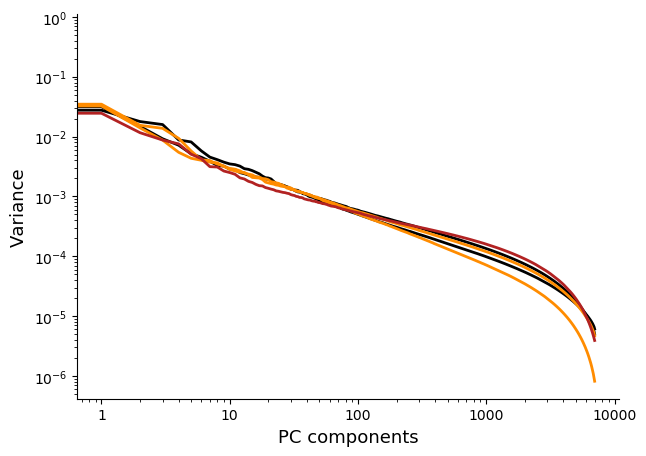

In [10]:
#BLNLIGHT
import matplotlib
import powerlaw
from scipy import stats
    
#BLNLIGHT
plotlist = wt_vlist, het_vlist, hom_vlist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']

for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
    

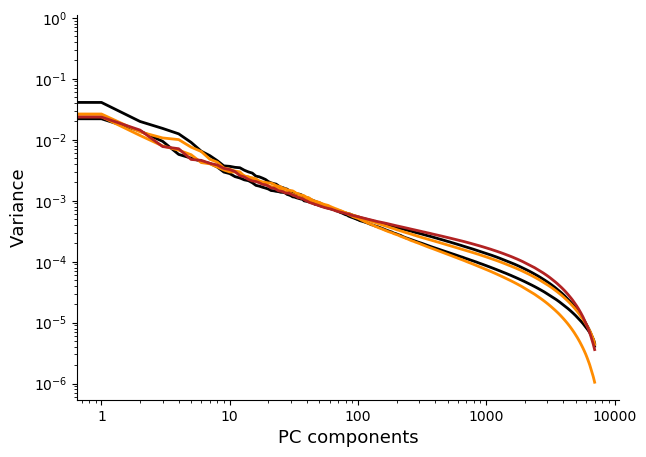

In [12]:
#PTZ02
import matplotlib
import powerlaw
from scipy import stats
    
#BLNLIGHT
plotlist = wt_vlist, het_vlist, hom_vlist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']

for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
    